# Transcending Scales

In [48]:
from brian2 import *

## Single Neuron Transfer Property
### Single Neuron Current Injection

In [49]:
start_scope() #Ignore brian objects created prior to this command

# neuronal parameters
N = 1 # total number of neurons
vth = -55*mV# threshold potential
vr = -70*mV# reset potential
vl = -70*mV
tau = 10.0*ms # membrane time constant
Cm = 250*pF

#Equations are assigned as strings
eqs_neuron_LIFI='''
inp : amp
dv/dt = -(v-vl)/tau + inp/Cm : volt
'''

Ee = 0*mV
Ei = -85*mV
gl = 17*nS
Ge = 2*nS
Gi = -2*nS 
eqs_neuron_LIFC='''
inp : amp
dv/dt = (-gl*(v-vl) + Ge*ge*(Ee-vl) + Gi*gi*(Ei-vl) + inp)/Cm: volt
dge/dt = -ge*(1./tau) : 1
dgi/dt = -gi*(1./tau) : 1
'''

In [3]:
# Single Neuron
P=NeuronGroup(N=N,model=eqs_neuron_LIFI,threshold='v>=vth',reset='v=vr',refractory=2*ms,method='euler')

# Devices
sm = SpikeMonitor(P) # Record spike times
sr = PopulationRateMonitor(P) #Record rate of population activity
sm_vm = StateMonitor(P,'v',record=range(N)) # Record State Variables like Vm

store('initialized')

Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s


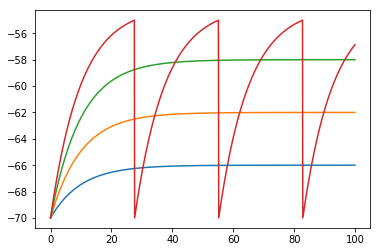

In [32]:
# Rheobase
vs = []
for i in np.arange(0.1,0.5,0.1):
    # Simulation
    restore('initialized')

    P.v = vl#initial value
    P.inp = i*namp #input

    run(100*ms, report='text');
    
    # Store data
    vs.append(sm_vm.v/mV)
ts = sm_vm.t/ms

for vv in vs:
    plt.plot(ts, transpose(vv))

Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s


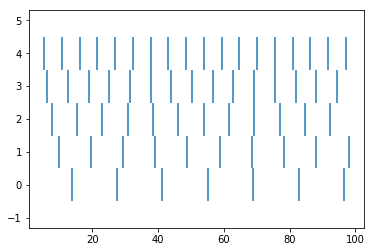

In [36]:
# F-I curve
es = []
for i in np.arange(0.5,1.0,0.1):
    # Simulation
    restore('initialized')

    P.v = vl#initial value
    P.inp = i*namp #input

    run(100*ms, report='text');
    
    # Store data
    es.append(sm.t/ms)
    
plt.eventplot(es);

Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s


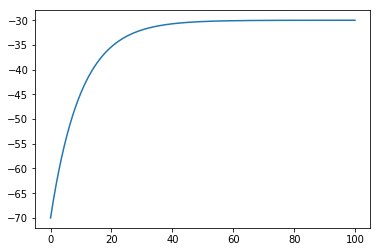

In [62]:
# Free-state Dynamic
# Single Neuron
vf = 1e9*mV
Pf=NeuronGroup(N=N,model=eqs_neuron_LIFI,threshold='v>=vf',reset='v=vr',refractory=2*ms,method='euler')

# Devices
sm_vmf = StateMonitor(Pf,'v',record=range(N)) # Record State Variables like Vm

Pf.v = vl#initial value
Pf.inp = 1*namp #input

run(100*ms, report='text');

# Plot
figure()
plot(sm_vmf.t/ms,transpose(sm_vmf.v/mV));